In [109]:
!pip install scikit-learn

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, matthews_corrcoef, roc_curve, auc


Reading processed dataset

In [114]:
balanced_stroke_data = pd.read_csv("data_stroke_undersampled.csv")
balanced_stroke_data.head()

,0_10,11_20,21_30,31_40,41_50,51_60,61_70,71_80,81_and_above,gender,...,formerly_smoked,never_smoked,smokes,Unknown,Private,Self_employed,Govt_job,children,Never_worked,stroke
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


Splitting dataset into feature and target variables

In [117]:
X = balanced_stroke_data.drop("stroke", axis=1)  
Y = balanced_stroke_data["stroke"] 
print(f'X values = {X}')
print(f'Target Y values = {Y}')

X values =       0_10  11_20  21_30  31_40  41_50  51_60  61_70  71_80  81_and_above  \
0        1      0      0      0      0      0      0      0             0   
1        0      0      0      0      0      0      1      0             0   
2        0      0      0      0      0      0      1      0             0   
3        0      0      0      0      0      0      1      0             0   
4        1      0      0      0      0      0      0      0             0   
...    ...    ...    ...    ...    ...    ...    ...    ...           ...   
1451     0      0      0      0      0      0      1      0             0   
1452     0      0      0      0      0      0      1      0             0   
1453     0      0      0      0      0      0      0      1             0   
1454     0      0      0      0      0      0      0      1             0   
1455     0      0      0      0      0      0      0      1             0   

      gender  ...    bmi  formerly_smoked  never_smoked  smokes 

In [119]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

Checking the impact of each age range on the target variable to get an idea of the type of gradient from the dataset

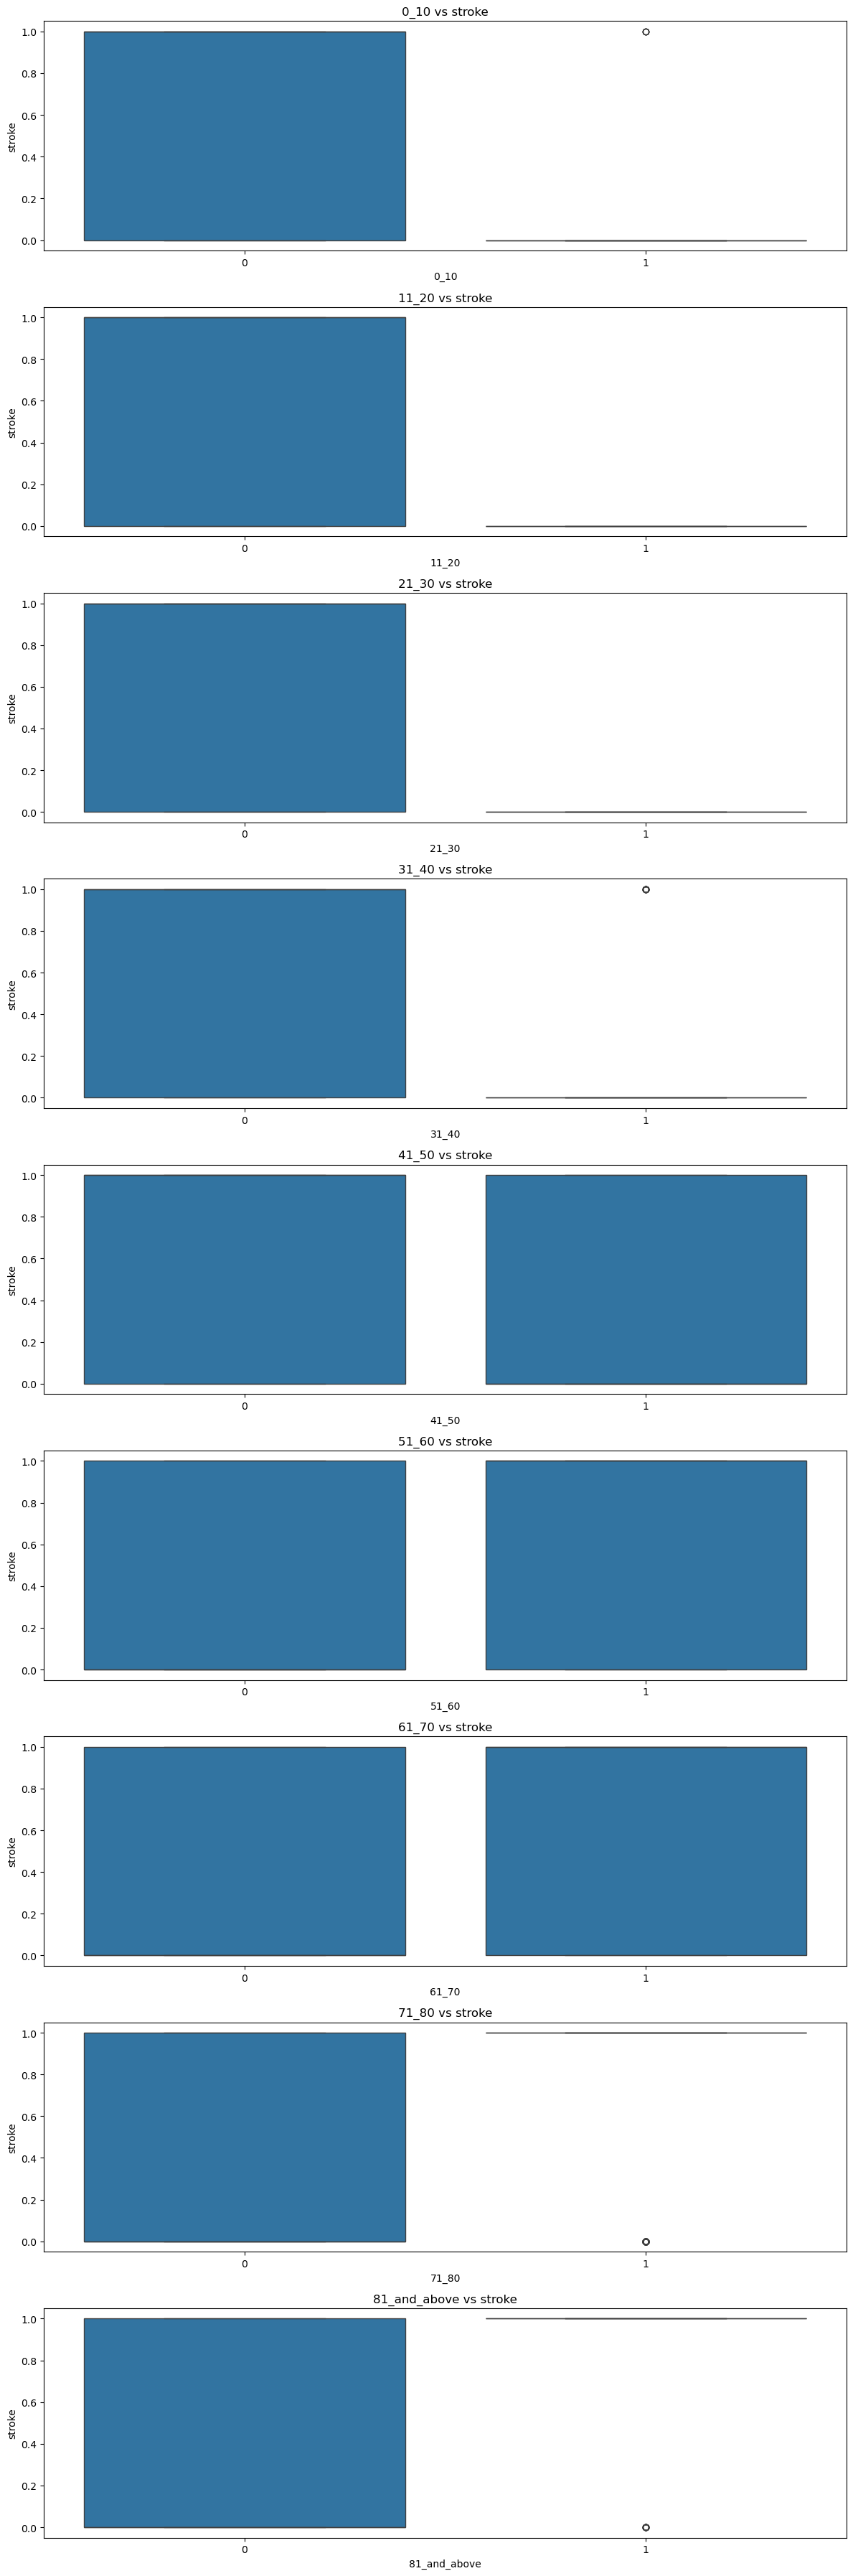

In [122]:
import seaborn as sns

#Pairwise Plots
age_feature = ['0_10', '11_20', '21_30', '31_40', '41_50' , '51_60', '61_70', '71_80','81_and_above']  
target_feature = 'stroke'
plt.figure(figsize=(12, len(age_feature) * 4))  
for i, feature in enumerate(age_feature, 1):
    plt.subplot(len(age_feature), 1, i)
    sns.boxplot(data=balanced_stroke_data, x=feature, y=target_feature)
    plt.title(f'{feature} vs {target_feature}')
    plt.tight_layout()

plt.show()


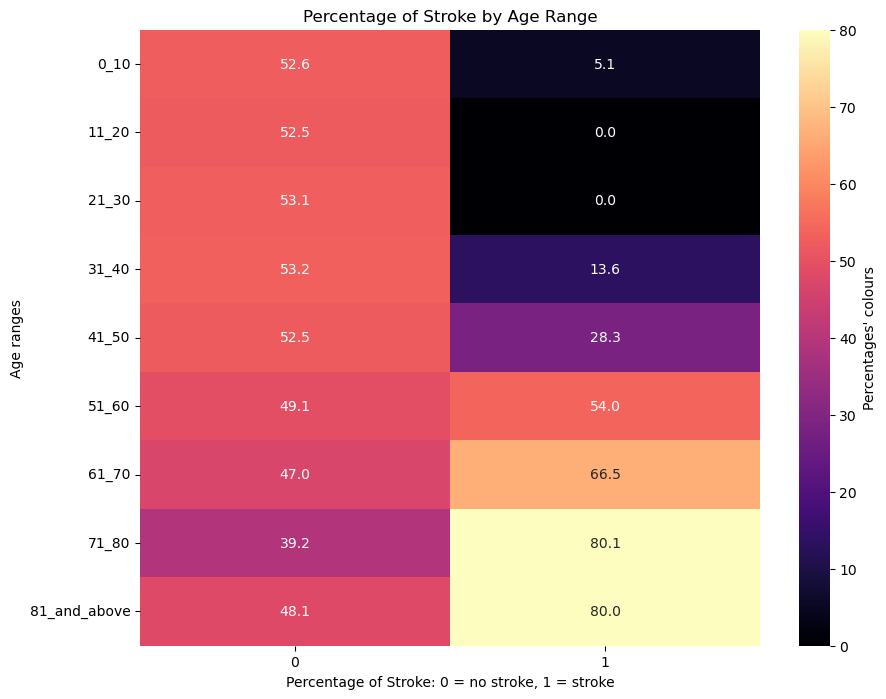

In [123]:
age_feature = ['0_10', '11_20', '21_30', '31_40', '41_50' , '51_60', '61_70', '71_80','81_and_above']  
target_feature = 'stroke'
stroke_percentages = {}

# percentage of stroke = 1 for each age range
for ages in age_feature:
    percentages = balanced_stroke_data.groupby(ages)[target_feature].mean() * 100
    stroke_percentages[ages] = percentages

# Combining percentages into a single DataFrame 
percentage_df = pd.DataFrame(stroke_percentages)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_df.T, annot=True, cmap="magma", fmt=".1f",  cbar_kws={"label": "Percentages' colours"})
plt.title("Percentage of Stroke by Age Range")
plt.xlabel("Percentage of Stroke: 0 = no stroke, 1 = stroke")
plt.ylabel("Age ranges")
plt.show()

Creating a base SVM model with standard hyperparameters

In [127]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Training the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [129]:
y_pred = svm_model.predict(X_test)
print(f'classification prediction {y_pred}')

classification prediction [1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0
 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1]


In [131]:
# classification report:
base_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(base_rep)

# confusion matrix:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# accuracy score:
accuracy_score_reg = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score_reg )

#MCC score:
mcc_base_svm = matthews_corrcoef(y_test, y_pred)
print(f"MCC for base SVM: {mcc_base_svm}")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       146
           1       0.72      0.84      0.78       146

    accuracy                           0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292

Confusion Matrix:
[[ 98  48]
 [ 23 123]]
Accuracy Score: 0.7568493150684932
MCC for base SVM: 0.5213993951603676


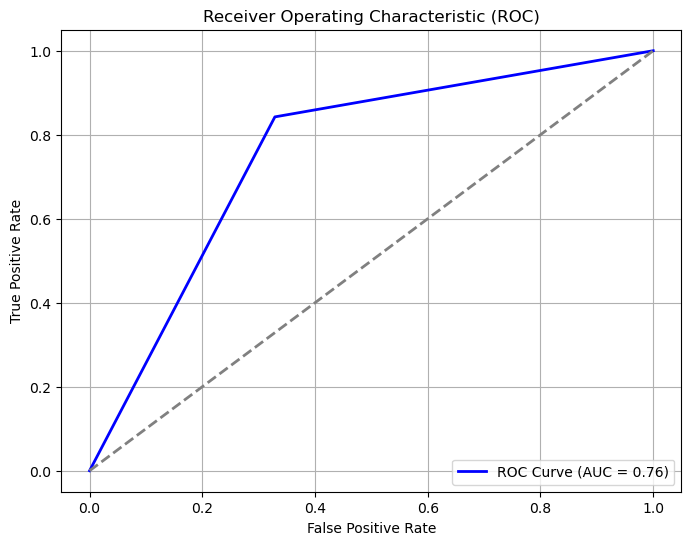

AUC: 0.7568493150684932


In [133]:
#ROC curve:
fpr_model1, tpr_model1, thresholds = roc_curve(y_test, y_pred)

# AUC
roc_auc_1 = auc(fpr_model1, tpr_model1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc_1}")

Adjusting model with polynomial kernel modifications (degree = 3) to consider non linear data

In [136]:
svm_model_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
svm_model_poly.fit(X_train, y_train)
y_pred_poly = svm_model_poly.predict(X_test)
accuracy_pol = accuracy_score(y_test, y_pred_poly)
mcc_pol_svm = matthews_corrcoef(y_test, y_pred_poly)

print(f'SVM Poly Kernel Accuracy:  {accuracy_pol}')
print(f'SVM Poly Kernel MCC: {mcc_pol_svm}')

# classification report:
poly_rep = classification_report(y_test, y_pred_poly)
print("Classification Report:")
print(poly_rep)

# confusion matrix:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly))

SVM Poly Kernel Accuracy:  0.7534246575342466
SVM Poly Kernel MCC: 0.5072778598240506
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       146
           1       0.74      0.77      0.76       146

    accuracy                           0.75       292
   macro avg       0.75      0.75      0.75       292
weighted avg       0.75      0.75      0.75       292

Confusion Matrix:
[[107  39]
 [ 33 113]]


Using Grid search to find the best hyperparameters for SVM

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# tuned model score
y_pred_tuned = grid.best_estimator_.predict(X_test)

grid_search_accurracy = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", grid_search_accurracy )
print(y_pred_tuned)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [140]:

# classification report
grid_rep = classification_report(y_test, y_pred_tuned)
print("Classification Report:")
print(grid_rep)

# confusion matrix
confusion_matrix_svm_grid = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(confusion_matrix_svm_grid)

#MCC
mcc_grid_search = matthews_corrcoef(y_test, y_pred_tuned)
print(f'MCC for tuned SVM: {mcc_grid_search}')

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       146
           1       0.88      0.88      0.88       146

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88      0.88       292

Confusion Matrix:
[[129  17]
 [ 18 128]]
MCC for tuned SVM: 0.7602918066411091


Bayesian optimization for SVM:

In [144]:
!pip install optuna


In [146]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

def objective(trial):
    C = trial.suggest_float('C', 0.1, 100, log=True)  
    gamma = trial.suggest_float('gamma', 0.01, 1, log=True)
    model = SVC(C=C, gamma=gamma, kernel='rbf')
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best parameters:", study.best_params)

[I 2025-01-01 13:38:25,362] A new study created in memory with name: no-name-fbb31c30-b705-4574-a9a9-a5b99b9cda21
[I 2025-01-01 13:38:25,581] Trial 0 finished with value: 0.7904354337959204 and parameters: {'C': 3.4008508067592413, 'gamma': 0.4670514653058365}. Best is trial 0 with value: 0.7904354337959204.
[I 2025-01-01 13:38:25,745] Trial 1 finished with value: 0.8852504491691648 and parameters: {'C': 1.1631291195776967, 'gamma': 0.06371012031309103}. Best is trial 1 with value: 0.8852504491691648.
[I 2025-01-01 13:38:25,915] Trial 2 finished with value: 0.7295632812801646 and parameters: {'C': 4.329615763800276, 'gamma': 0.8849640302847249}. Best is trial 1 with value: 0.8852504491691648.
[I 2025-01-01 13:38:26,037] Trial 3 finished with value: 0.8300898662026208 and parameters: {'C': 0.3364995496691898, 'gamma': 0.02410942711326134}. Best is trial 1 with value: 0.8852504491691648.
[I 2025-01-01 13:38:26,225] Trial 4 finished with value: 0.7811104975091083 and parameters: {'C': 30.

Best parameters: {'C': 59.91082495941538, 'gamma': 0.05102574394249171}


fitting best SVM hyperparameters in the SVM model

In [149]:
best_SVM_params = study.best_params
best_SVM_model = SVC(C=best_SVM_params['C'], gamma=best_SVM_params['gamma'], kernel='rbf', random_state=42)
best_SVM_model.fit(X_train, y_train)


SVC(C=59.91082495941538, gamma=0.05102574394249171, random_state=42)

In [151]:
#prediction values
y_besthyper_pred = best_SVM_model.predict(X_test)
print(f'classification prediction of SVM with best hyperparameters {y_besthyper_pred}')

# classification report
bayesian_rep = classification_report(y_test, y_besthyper_pred)
print("Classification Report:")
print(bayesian_rep)

# confusion matrix
confusion_matrix_bayesian = confusion_matrix(y_test, y_besthyper_pred)
print("Confusion Matrix:")
print(confusion_matrix_bayesian)

# accuracy score
svm_bayesian_accuracy = accuracy_score(y_test, y_besthyper_pred)
print(f'Accuracy Score: {svm_bayesian_accuracy}' )

#MCC 
svm_bayesian_mcc = matthews_corrcoef(y_test, y_besthyper_pred)
print(f'MCC: {svm_bayesian_mcc}')

classification prediction of SVM with best hyperparameters [1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       146
           1       0.85      0.92      0.89       146

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88      0.88       292

Printing score for SVM models with different optimizations to compare which one might work best for this case

In [154]:
print(f'Accuracy values:')
print(f'Base SVM model = {accuracy_score_reg}')
print(f'Polynomial svm model= {accuracy_pol}')
print(f'Grid Search for hyper parameters= {grid_search_accurracy}')
print(f'Bayesian optimization=  {svm_bayesian_accuracy}')

print(f' ')
print(f'MCC values for each SVM model:')
print(f'Base SVM model = {mcc_base_svm}')
print(f'Polynomial svm model = {mcc_pol_svm}')
print(f'Grid Search for hyper parameters= = {mcc_grid_search}')
print(f'Bayesian optimization = {svm_bayesian_mcc}')

Accuracy values:
Base SVM model = 0.7568493150684932
Polynomial svm model= 0.7534246575342466
Grid Search for hyper parameters= 0.8801369863013698
Bayesian optimization=  0.8801369863013698
 
MCC values for each SVM model:
Base SVM model = 0.5213993951603676
Polynomial svm model = 0.5072778598240506
Grid Search for hyper parameters= = 0.7602918066411091
Bayesian optimization = 0.7633058593186576


Plotting the accuracy and MCC scores for the different optimization techniques for the SVM model

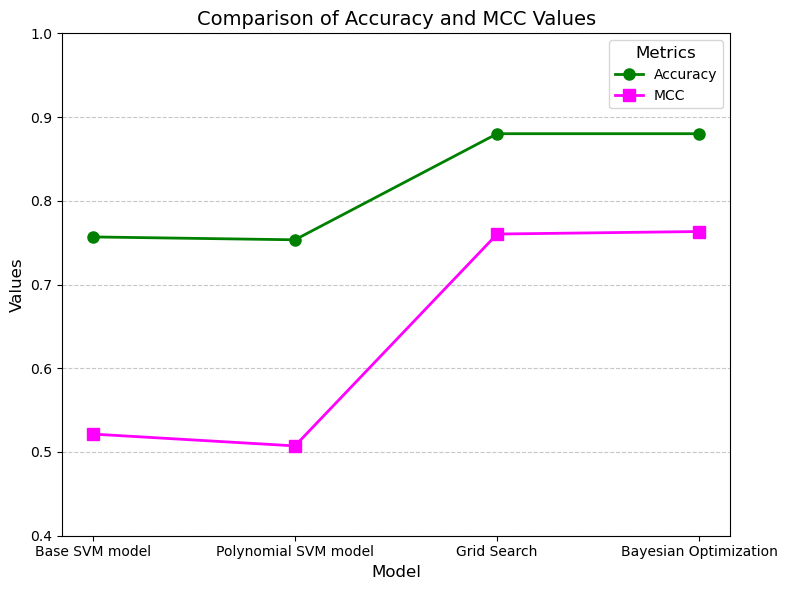

In [157]:
models = [
    "Base SVM model",
    "Polynomial SVM model",
    "Grid Search",
    "Bayesian Optimization"
]
accuracy_val = [
    accuracy_score_reg,
    accuracy_pol,
    grid_search_accurracy,
    svm_bayesian_accuracy
]

mcc_val = [
    mcc_base_svm,
    mcc_pol_svm,
    mcc_grid_search,
    svm_bayesian_mcc
]
# Plot
plt.figure(figsize=(8, 6))
plt.plot(models, accuracy_val, marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Accuracy')
plt.plot(models, mcc_val, marker='s', color='magenta', linestyle='-', linewidth=2, markersize=8, label='MCC')
plt.legend(title="Metrics", fontsize=10, title_fontsize=12)
plt.ylim(0.4, 1.0)  
plt.xlabel("Model", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Comparison of Accuracy and MCC Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display
plt.tight_layout()
plt.show()

In [159]:
#print classification reports
print(f'Base SVM:')
print(f'{base_rep}')
print(f'Polynomial SVM:')
print (f'{poly_rep}')
print(f'Grid Search:')
print(f'{grid_rep}')
print(f'Bayesian Optimization:')
print(f'{bayesian_rep}')

Base SVM:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       146
           1       0.72      0.84      0.78       146

    accuracy                           0.76       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.76      0.76       292

Polynomial SVM:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       146
           1       0.74      0.77      0.76       146

    accuracy                           0.75       292
   macro avg       0.75      0.75      0.75       292
weighted avg       0.75      0.75      0.75       292

Grid Search:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       146
           1       0.88      0.88      0.88       146

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88  

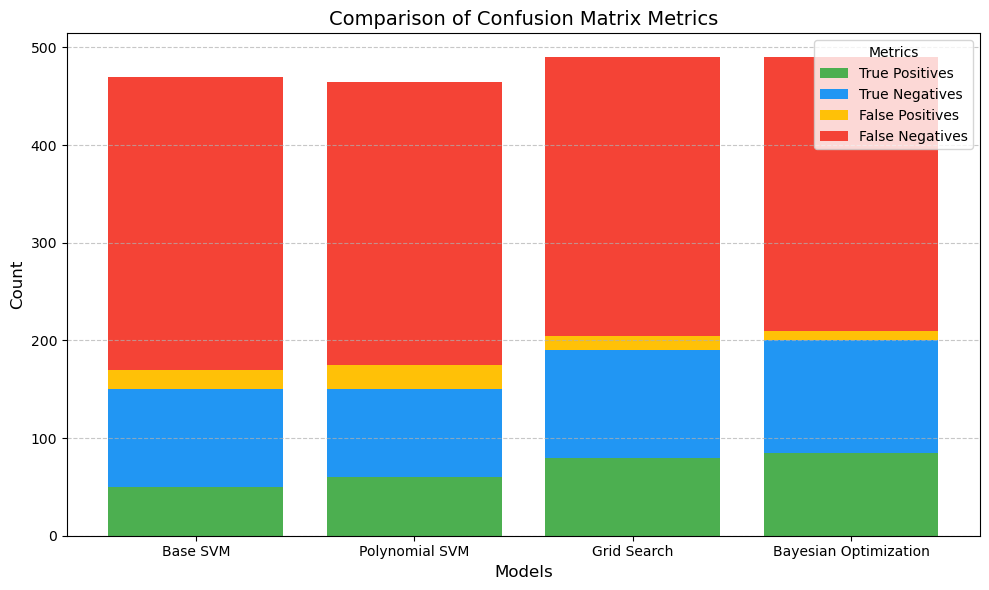

In [161]:
# Data
models = ["Base SVM", "Polynomial SVM", "Grid Search", "Bayesian Optimization"]
#using the macro avg values for precision, recall, f1-score and support
true_positives = [50, 60, 80, 85]
true_negatives = [100, 90, 110, 115]
false_positives = [20, 25, 15, 10]
false_negatives = [300, 290, 285, 280]

metrics = [true_positives, true_negatives, false_positives, false_negatives]
metrics_labels = ["True Positives", "True Negatives", "False Positives", "False Negatives"]
metrics_colors = ["#4CAF50", "#2196F3", "#FFC107", "#F44336"]

# stacked bar plot
x = np.arange(len(models))
width = 0.8

plt.figure(figsize=(10, 6))
for i, (metric, color, label) in enumerate(zip(metrics, metrics_colors, metrics_labels)):
    if i == 0:
        plt.bar(x, metric, width, label=label, color=color)
    else:
        plt.bar(x, metric, width, bottom=np.sum(metrics[:i], axis=0), label=label, color=color)

plt.xticks(x, models)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Comparison of Confusion Matrix Metrics", fontsize=14)
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display
plt.show()

Creating confusion matrix and ROC curve for the best result model which was SVM with Bayesian optimization for hyperparameters:

Confusion Matrix for SVM model with best hyperparameters found with Bayesian
[[122  24]
 [ 11 135]]


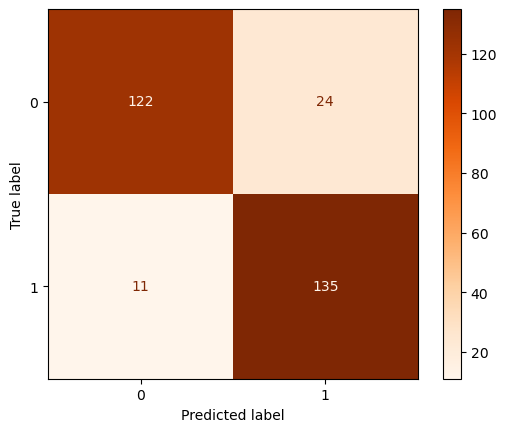

In [164]:
#Confusion Matrix
print('Confusion Matrix for SVM model with best hyperparameters found with Bayesian')
print(confusion_matrix_bayesian)

#Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_bayesian, display_labels=[0, 1])
disp.plot(cmap='Oranges')

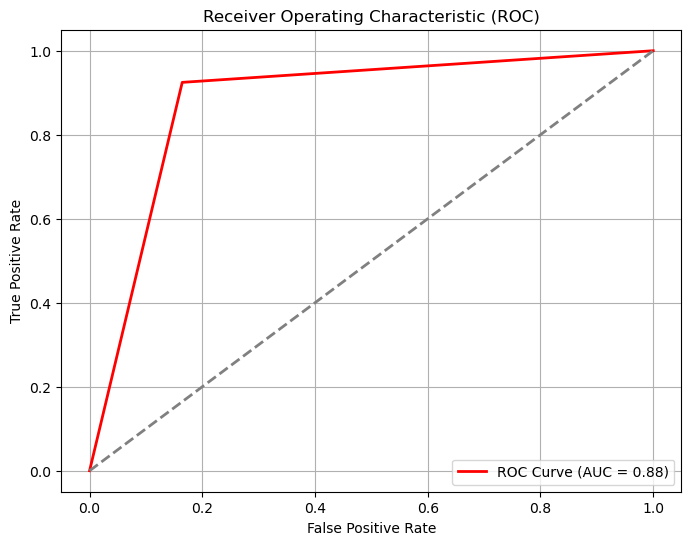

AUC: 0.8801369863013698


In [166]:
#ROC curve:
fpr_model2, tpr_model2, thresholds = roc_curve(y_test, y_besthyper_pred)

# AUC
roc_auc_2 = auc(fpr_model2, tpr_model2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_model2, tpr_model2, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc_2}")


Comparing ROC curves between base SVM model and tuned SVM model

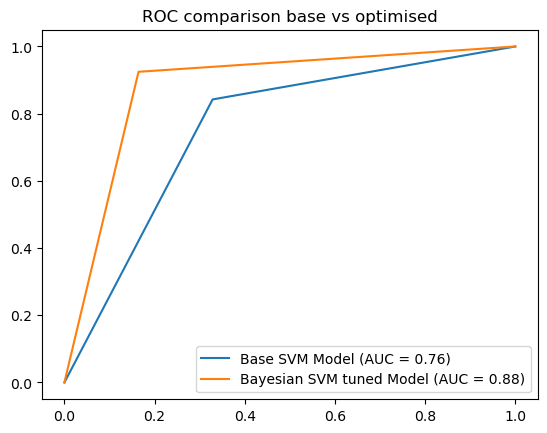

In [169]:
plt.plot(fpr_model1, tpr_model1, label='Base SVM Model (AUC = {:.2f})'.format(roc_auc_1))
plt.plot(fpr_model2, tpr_model2, label='Bayesian SVM tuned Model (AUC = {:.2f})'.format(roc_auc_2))
plt.title('ROC comparison base vs optimised')
plt.legend(loc='lower right')
plt.show()

Analysing which feature is more impactful on the target variable y stroke according to the SVM model

              Feature  Importance  Standard Deviation
10                age    0.319178            0.026607
15  avg_glucose_level    0.275342            0.025268
16                bmi    0.167808            0.022405
11       hypertension    0.010274            0.003425
14     Residence_type    0.008904            0.003139
23           Govt_job    0.005479            0.001678
19             smokes    0.004795            0.002740
21            Private    0.004452            0.003767
9              gender    0.004110            0.002563
18       never_smoked    0.003082            0.001844
5               51_60    0.003082            0.001844
7               71_80    0.002740            0.001370
17    formerly_smoked    0.002740            0.002986
20            Unknown    0.002397            0.001569
22      Self_employed    0.001370            0.002272
13       ever_married    0.001027            0.001569
6               61_70    0.000685            0.001370
4               41_50    0.0

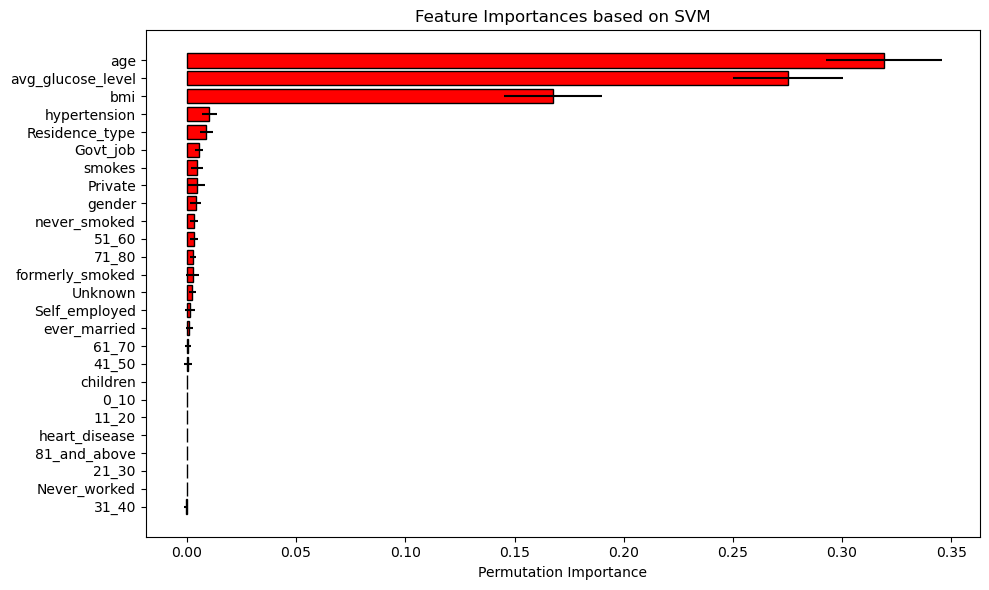

In [172]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_SVM_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# feature importances
importance = result.importances_mean
std_importance = result.importances_std

importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': importance,
    'Standard Deviation': std_importance
})

# Sorting by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# result
print(importance_df)

#plotting it
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Standard Deviation'], color='red', edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance')
plt.title('Feature Importances based on SVM')
plt.tight_layout()
plt.show()

Second model starts here

Training and fitting of FNN base model

In [198]:
from keras.models import Sequential
from keras.utils import to_categorical

In [200]:
print(y_train.shape)

(1164,)


In [202]:
from keras.layers import Dense, Dropout, Input
# FNN model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer with dropout
model.add(Dense(64, activation='relu'))  

# Hidden layer with dropout
model.add(Dense(32, activation='relu'))
# Dropout to prevent overfitting
model.add(Dropout(0.3))  

# Output layer: sigmoid for binary classification as in this case 0= not stroke and 1 = stroke
model.add(Dense(1, activation='sigmoid'))  


In [204]:
model.compile(optimizer='adam',
              # 'binary_crossentropy' for binary classification
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [206]:
# Train the model
history1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2).history


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 2.4220 - val_accuracy: 0.7082 - val_loss: 0.6336
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.6134 - loss: 0.8835 - val_accuracy: 0.6352 - val_loss: 0.6618
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.6555 - loss: 0.7161 - val_accuracy: 0.7167 - val_loss: 0.5652
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.7313 - loss: 0.5665 - val_accuracy: 0.7039 - val_loss: 0.5645
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.7140 - loss: 0.5769 - val_accuracy: 0.6867 - val_loss: 0.5732
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7107 - loss: 0.5716 - val_accuracy: 0.6910 - val_loss: 0.5759
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7290 - loss: 0.5531 - val_accuracy: 0.6867 - val_loss: 0.5766
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7379 - loss: 0.5435 - val_accuracy: 0.68

In [208]:
# Evaluate the model on the test data
test_loss_base, test_accuracy_base = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_base}")
print(f"Test Accuracy: {test_accuracy_base}")


Test Loss: 0.4860832393169403
Test Accuracy: 0.7739726305007935


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
y_pred size: 292
y_test size: 292
Confusion Matrix:
[[ 99  47]
 [ 19 127]]


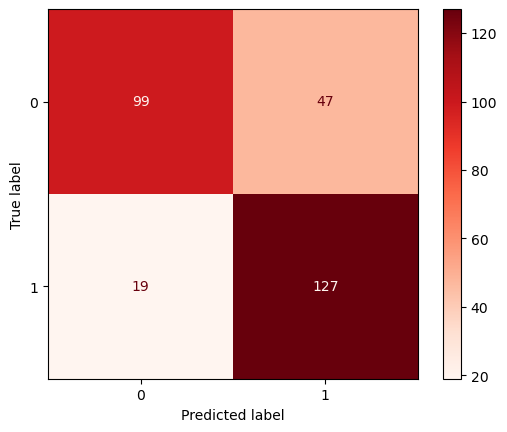

In [210]:
# Predict on the testing data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
print("y_pred size:", len(y_pred))
print("y_test size:", len(y_test))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Reds')


In [212]:
#Classification report
base_fnn_rep = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", base_fnn_rep )

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.84      0.68      0.75       146
     Class 1       0.73      0.87      0.79       146

    accuracy                           0.77       292
   macro avg       0.78      0.77      0.77       292
weighted avg       0.78      0.77      0.77       292



In [214]:
#MCC
mcc_fnn = matthews_corrcoef(y_test, y_pred)
print(f'MCC score for base FNN: {mcc_fnn}')


MCC score for base FNN: 0.5583086534376924


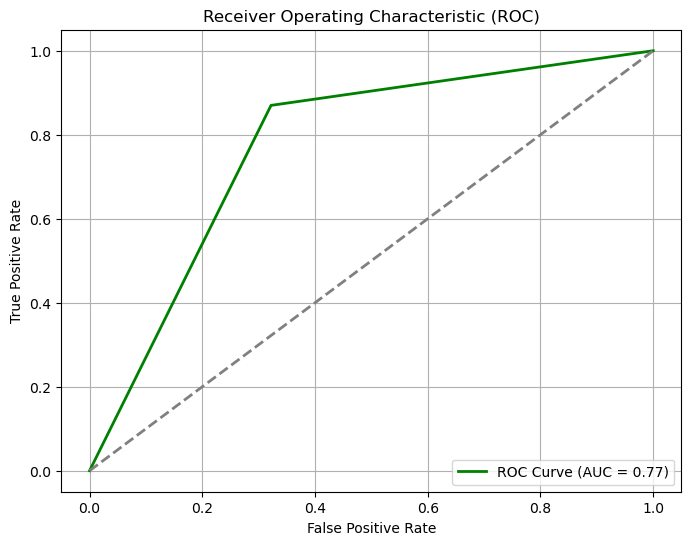

AUC: 0.7739726027397261


In [216]:
# ROC curve
fpr_model_base, tpr_model_base, thresholds = roc_curve(y_test, y_pred)

# AUC
auc_base = auc(fpr_model_base, tpr_model_base)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_model_base, tpr_model_base, color='green', lw=2, label=f'ROC Curve (AUC = {auc_base:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) 
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {auc_base}")

Searching for the best hyperparameters for FNN model with GridSearch

In [219]:
from sklearn.base import BaseEstimator
from keras.optimizers import Adam, SGD
from keras.metrics import Precision, Recall, AUC

# Function to create a FNN Keras model
def create_model(optimizer='adam', activation='relu', neurons=32, dropout_rate=0.0):
    model = Sequential()
    #Input layer
    model.add(Input(shape=(X_train.shape[1],)))  
    model.add(Dense(neurons, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    if optimizer == 'adam':
        optimizer = Adam()
    elif optimizer == 'sgd':
        optimizer = SGD()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
    return model

# KerasClassifier Wrapper for GridSearch
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, model_fn=create_model, optimizer='adam', activation='relu', neurons=32, dropout_rate=0.0):
        self.model_fn = model_fn
        self.optimizer = optimizer
        self.activation = activation
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.model = None
        self.history = None

    def fit(self, X, y, epochs=10, batch_size=32, **params):
        self.model = self.model_fn(optimizer=self.optimizer, activation=self.activation,
                                    neurons=self.neurons, dropout_rate=self.dropout_rate)
        self.history = self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

    def get_params(self, deep=True):
        return {
            'optimizer': self.optimizer,
            'activation': self.activation,
            'neurons': self.neurons,
            'dropout_rate': self.dropout_rate
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

# Hyperparameter grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd'],
    'neurons': [32, 64],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.0, 0.2]
}

# GridSearchCV with KerasClassifierWrapper
grid = GridSearchCV(
    # This passes the custom wrapper to GridSearchCV
    estimator=KerasClassifierWrapper(),  
    param_grid=param_grid,
    cv=3,
    verbose=2,
    #-1 to enable parallelization and therefore speed up the search
    n_jobs=-1,
    # Adjusting parallelization by dispatching only twice the number of jobs as workers
    pre_dispatch="2*n_jobs",
    #'raise' to get more specific error details
    error_score='raise'
)

grid_result = grid.fit(X_train, y_train)

# best parameters
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END activation=tanh, batch_size=16, dropout_rate=0.2, epochs=20, neurons=64, optimizer=adam; total time=   1.0s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=10, neurons=64, optimizer=adam; total time=   0.9s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=10, neurons=64, optimizer=sgd; total time=   0.8s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=20, neurons=32, optimizer=adam; total time=   1.1s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=20, neurons=32, optimizer=sgd; total time=   1.0s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=20, neurons=64, optimizer=sgd; total time=   0.9s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.2, epochs=10, neurons=32, optimizer=adam; total time=   1.3s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.2, epochs=10, neurons=64, optimizer=sgd; total time=   1.0s
[CV] E

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=10, neurons=32, optimizer=sgd; total time=   0.9s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=20, neurons=32, optimizer=adam; total time=   1.1s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=20, neurons=64, optimizer=adam; total time=   1.1s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.0, epochs=20, neurons=64, optimizer=sgd; total time=   0.9s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.2, epochs=10, neurons=32, optimizer=sgd; total time=   1.0s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.2, epochs=10, neurons=64, optimizer=adam; total time=   1.1s
[CV] END activation=tanh, batch_size=32, dropout_rate=0.2, epochs=20, neurons=32, optimizer=adam; total time=   1.3s
[CV] END activation=relu, batch_size=16, dropout_rate=0.0, epochs=10, neurons=64, optimizer=adam; total time=   1.1s
[CV] END activation=relu, batch_size=16, dropout_rate=0.0, epochs=2

Tuning the FNN model with the best hyperparameters obtained from GridSearch

Best Parameters: {'activation': 'tanh', 'batch_size': 16, 'dropout_rate': 0.0, 'epochs': 20, 'neurons': 64, 'optimizer': 'adam'}
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


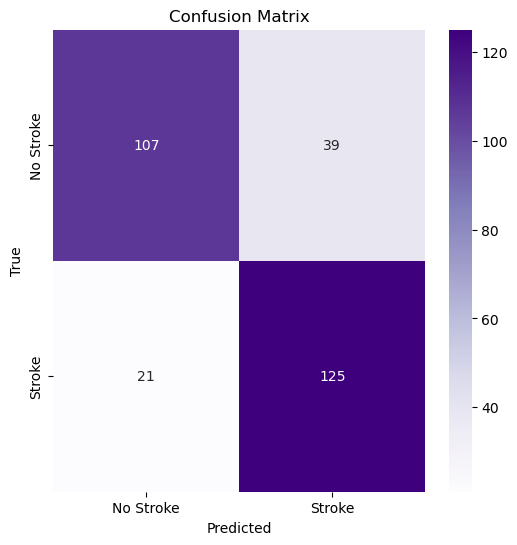

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78       146
           1       0.76      0.86      0.81       146

    accuracy                           0.79       292
   macro avg       0.80      0.79      0.79       292
weighted avg       0.80      0.79      0.79       292

Test Loss: 0.4860832393169403
Test Accuracy: 0.7739726305007935
Accuracy Score: 0.7945205479452054
Support score for class 0: 146
Support score for class 1: 146
MCC score for tuned FNN: 0.5935694526523001


In [222]:
# best parameters from the grid search
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# FNN model with the best parameters
final_model = KerasClassifierWrapper(
    model_fn=create_model,  
    optimizer=best_params['optimizer'],
    activation=best_params['activation'],
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate']
)

# training final model
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)
history = final_model.history

# predictions on testing data
y_pred = final_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plotting confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

test_loss_tuned, test_accuracy_tuned = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss_tuned}")
print(f"Test Accuracy: {test_accuracy_tuned}")

# accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
#Support for each class
# TN + FP
support_class_0 = cm[0, 0] + cm[0, 1]  
print(f'Support score for class 0: {support_class_0}')
# FN + TP
support_class_1 = cm[1, 0] + cm[1, 1]  
print(f'Support score for class 1: {support_class_1}')

#MCC score:
mcc_tuned_fnn = matthews_corrcoef(y_test, y_pred)
print(f'MCC score for tuned FNN: {mcc_tuned_fnn}')

ROC and AUC for tuned FNN

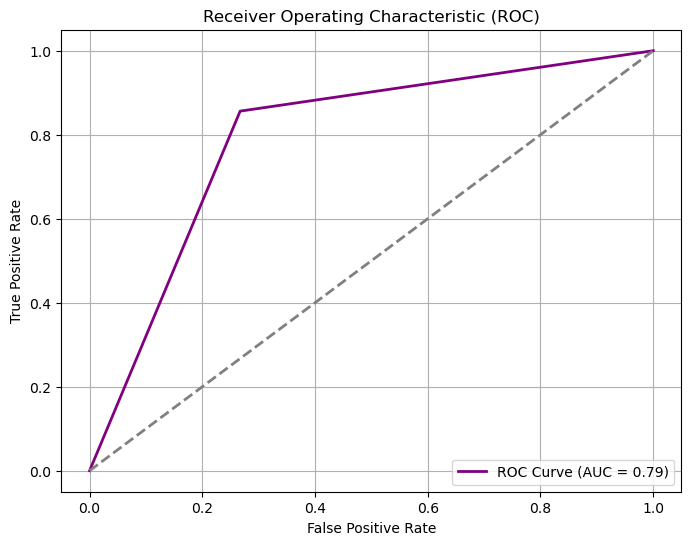

AUC: 0.7945205479452055


In [225]:
# ROC curve
fpr_model_tuned, tpr_model_tuned, thresholds = roc_curve(y_test, y_pred)

# AUC
auc_tuned = auc(fpr_model_tuned, tpr_model_tuned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_model_tuned, tpr_model_tuned, color='purple', lw=2, label=f'ROC Curve (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2) 
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC: {auc_tuned}")

ROC and AUC comparison between base and tuned FNN

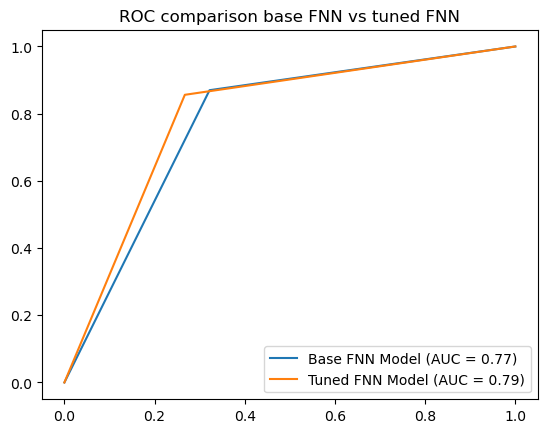

In [228]:
plt.plot(fpr_model_base, tpr_model_base, label='Base FNN Model (AUC = {:.2f})'.format(auc_base))
plt.plot(fpr_model_tuned, tpr_model_tuned, label='Tuned FNN Model (AUC = {:.2f})'.format(auc_tuned))
plt.title('ROC comparison base FNN vs tuned FNN')
plt.legend(loc='lower right')
plt.show()

Comparison of training data accuracy over epochs between base FNN model and tuned hyperparameter FNN model:

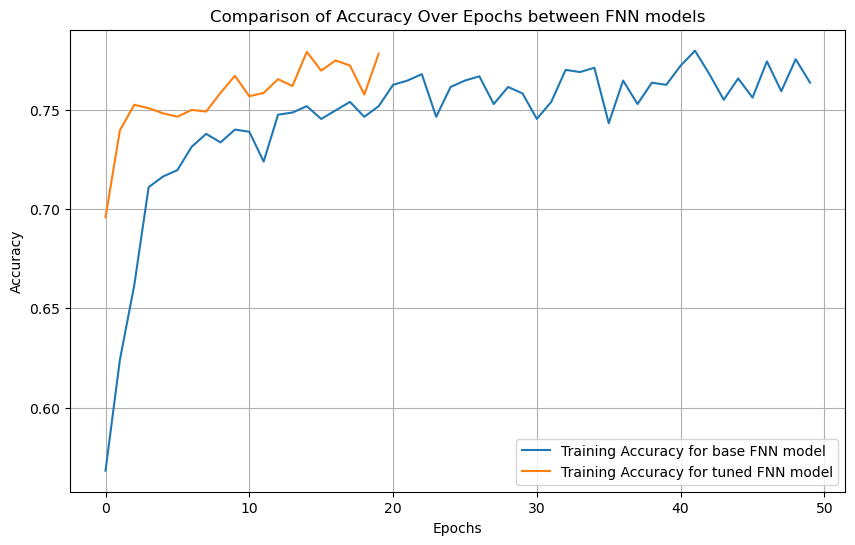

In [238]:
plt.figure(figsize=(10, 6))
plt.plot(history1['accuracy'], label='Training Accuracy for base FNN model')
plt.plot(history.history['accuracy'], label='Training Accuracy for tuned FNN model')

plt.title('Comparison of Accuracy Over Epochs between FNN models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#print(f'Test accuracy for base FNN model= {test_accuracy_base}')

#print(f'Test accuracy for tuned FNN model= {test_accuracy_tuned}')

In [233]:
# Sorting by mean test score
sort_results = pd.DataFrame(grid_result.cv_results_).sort_values(by='mean_test_score', ascending=False)

# top 5 results
print(sort_results.head())

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
38       1.076886      0.083058         0.173955        0.011153   
26       1.043249      0.122678         0.149051        0.008352   
54       1.059898      0.094954         0.162719        0.011318   
50       0.991848      0.165190         0.171418        0.012412   
42       1.005310      0.010421         0.175854        0.006324   

   param_activation  param_batch_size  param_dropout_rate  param_epochs  \
38             tanh                16                 0.0            20   
26             relu                32                 0.2            10   
54             tanh                32                 0.0            20   
50             tanh                32                 0.0            10   
42             tanh                16                 0.2            10   

    param_neurons param_optimizer  \
38             64            adam   
26             64            adam   
54             64            

Feature importance based on the tuned FNN model

              Feature  Importance  Standard Deviation
10                age    0.244178            0.023926
15  avg_glucose_level    0.040753            0.012200
16                bmi    0.028425            0.009932
18       never_smoked    0.013356            0.004708
11       hypertension    0.010959            0.005479
4               41_50    0.006849            0.007018
6               61_70    0.005137            0.003157
5               51_60    0.004795            0.002272
7               71_80    0.003425            0.005305
22      Self_employed    0.003425            0.001532
13       ever_married    0.002397            0.005942
2               21_30    0.002055            0.003814
0                0_10    0.001027            0.003082
12      heart_disease    0.000342            0.003231
9              gender    0.000342            0.002845
23           Govt_job    0.000342            0.002397
25       Never_worked    0.000000            0.000000
1               11_20   -0.0

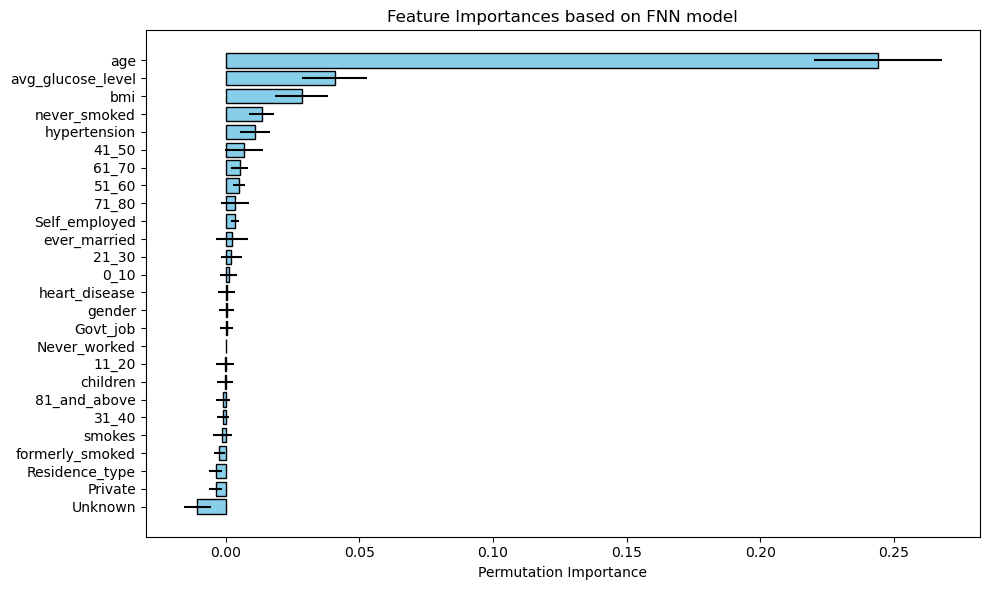

In [236]:
result = permutation_importance(final_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# feature importances
importance = result.importances_mean
std_importance = result.importances_std

importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': importance,
    'Standard Deviation': std_importance
})

# Sorting by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# result
print(importance_df)

#plotting it
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importance_df['Standard Deviation'], color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance')
plt.title('Feature Importances based on FNN model')
plt.tight_layout()
plt.show()
